In [1]:
import sys
sys.path.append(r'..\src')

import pandas as pd

import pylab as plt

import seaborn as sns

import numpy as np

from src import getGraphic
from ufc_fights import set_names_upper, set_name_winner, fix_columns, set_nan_columns, add_fighterid
from ufc_fighters import load_ufc, set_fighter_upper, clean_fighters

In [2]:
fighter = pd.read_csv(r'..\data\raw_fighter_details.csv')

data = pd.read_csv(r'..\data\data.csv')

ufc_fighters = pd.read_csv(r'..\data\ufc_fighters_official.csv')

# TABLA LUCHADORES

In [3]:
set_fighter_upper(fighter)

fighters = clean_fighters(fighter, ufc_fighters)

fighters

,fighter_id,Name,DOB,Wins,Losses,Draws,Categoría,Height_cm,Weight_kg,Reach_cm,Stance,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,0,AALON CRUZ,1989-09-20 00:00:00,8,4,0,Lightweight,182.88,65.25,198.120000,Switch,7.58,0.39,8.88,0.58,0.00,0.00,0.00,0.0
1,1,AARON BRINK,1974-11-12 00:00:00,8,3,0,Heavyweight,190.50,92.25,182.535871,Orthodox,3.49,0.42,5.71,0.57,0.00,0.00,0.00,0.0
2,2,AARON JEFFERY,1992-11-14 00:00:00,6,2,0,Middleweight,187.96,83.25,187.960000,Orthodox,6.21,0.84,4.14,0.39,0.00,0.00,0.75,0.0
3,3,AARON PHILLIPS,1989-08-05 00:00:00,12,4,0,Bantamweight,175.26,60.75,180.340000,Southpaw,1.65,0.56,3.44,0.39,0.00,0.00,0.44,0.4
4,4,AARON RILEY,1980-12-09 00:00:00,29,14,1,Lightweight,172.72,69.75,175.260000,Southpaw,3.45,0.34,3.78,0.61,1.18,0.34,0.60,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2203,ZARRUKH ADASHEV,1992-07-29 00:00:00,4,3,0,Flyweight,165.10,56.25,165.100000,Southpaw,1.93,0.23,3.35,0.60,0.00,0.00,0.00,0.0
2204,2204,ZHALGAS ZHUMAGULOV,1988-08-29 00:00:00,14,6,0,Flyweight,162.56,56.25,167.640000,Switch,4.17,0.49,4.00,0.58,1.50,0.21,0.33,0.0
2205,2205,ZHANG LIPENG,1990-03-10 00:00:00,9,9,1,Lightweight,180.34,69.75,180.340000,Southpaw,1.28,0.48,1.88,0.53,1.75,0.30,0.69,0.8
2206,2206,ZHANG WEILI,1989-08-13 00:00:00,21,3,0,Women's Strawweight,162.56,51.75,160.020000,Switch,6.38,0.45,4.43,0.53,1.26,0.23,1.00,0.5


# TABLA FIGHTS

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [5]:
data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [6]:
set_names_upper(data)

data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,ADRIAN YANEZ,GUSTAVO LOPEZ,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,TREVIN GILES,ROMAN DOLIDZE,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,TAI TUIVASA,HARRY HUNSUCKER,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,CHEYANNE BUYS,MONTSERRAT CONEJO,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,MARION RENEAU,MACY CHIASSON,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [7]:
'''set_name_winner(data)

data.head()'''

'set_name_winner(data)\n\ndata.head()'

In [8]:
fix_columns(data)

data.head()

,R_fighter,B_fighter,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,...,B_PCT_BODY,R_PCT_BODY,B_PCT_LEG,R_PCT_LEG,B_PCT_DISTANCE,R_PCT_DISTANCE,B_PCT_CLINCH,R_PCT_CLINCH,B_PCT_GROUND,R_PCT_GROUND
0,ADRIAN YANEZ,GUSTAVO LOPEZ,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.420000,0.330,...,48.0,50.0,40.0,NaN,26.0,33.0,30.0,50.0,40.0,NaN
1,TREVIN GILES,ROMAN DOLIDZE,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.660000,0.300,...,40.0,41.0,48.0,50.0,34.0,34.0,50.0,34.0,39.0,42.0
2,TAI TUIVASA,HARRY HUNSUCKER,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,...,NaN,44.0,NaN,45.0,NaN,31.0,NaN,43.0,NaN,43.0
3,CHEYANNE BUYS,MONTSERRAT CONEJO,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MARION RENEAU,MACY CHIASSON,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.535625,0.185,...,46.0,44.0,38.0,46.0,25.0,25.0,42.0,42.0,33.0,36.0


In [9]:
'''set_nan_columns(data)

data.head()'''

'set_nan_columns(data)\n\ndata.head()'

<AxesSubplot:>

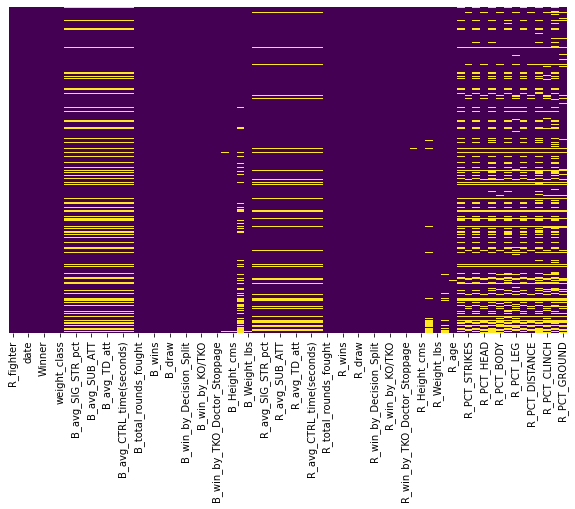

In [19]:
getGraphic(data)

In [12]:
data1 = data.copy()

In [13]:
data1 = data1[data1.date>'2002-01-01']

data1

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5726 entries, 0 to 5725
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   R_fighter                     5726 non-null   object        
 1   B_fighter                     5726 non-null   object        
 2   date                          5726 non-null   datetime64[ns]
 3   location                      5726 non-null   object        
 4   Winner                        5726 non-null   object        
 5   title_bout                    5726 non-null   bool          
 6   weight_class                  5726 non-null   object        
 7   B_avg_KD                      4442 non-null   float64       
 8   B_avg_SIG_STR_pct             4442 non-null   float64       
 9   B_avg_TD_pct                  4442 non-null   float64       
 10  B_avg_SUB_ATT                 4442 non-null   float64       
 11  B_avg_REV                     

In [23]:
data1.corr()

,title_bout,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,B_avg_SUB_ATT,B_avg_REV,B_avg_TD_att,B_avg_TD_landed,B_avg_CTRL_time(seconds),B_total_time_fought(seconds),...,B_PCT_BODY,R_PCT_BODY,B_PCT_LEG,R_PCT_LEG,B_PCT_DISTANCE,R_PCT_DISTANCE,B_PCT_CLINCH,R_PCT_CLINCH,B_PCT_GROUND,R_PCT_GROUND
title_bout,1.000000,0.109151,0.075919,0.042619,-0.019892,-0.018134,0.027550,0.056086,0.070817,0.078682,...,0.031072,0.070071,0.029126,0.024845,0.039443,0.112683,0.042833,0.072215,0.027462,0.047955
B_avg_KD,0.109151,1.000000,0.149366,-0.097668,-0.132426,-0.094086,-0.218474,-0.161835,-0.160319,-0.166587,...,0.037542,0.046933,0.029297,0.021305,0.185055,0.070651,-0.012892,0.014866,0.029126,0.041054
B_avg_SIG_STR_pct,0.075919,0.149366,1.000000,0.143368,0.057849,0.022853,0.044819,0.129017,0.209328,-0.076133,...,0.347431,0.040405,0.239983,0.083800,0.658104,0.096843,0.308516,0.034546,0.275001,0.031799
B_avg_TD_pct,0.042619,-0.097668,0.143368,1.000000,0.182951,0.057183,0.298505,0.600620,0.460030,0.134680,...,0.091678,-0.020382,0.025157,0.027622,0.002897,-0.008675,0.045612,-0.016100,0.002210,-0.006098
B_avg_SUB_ATT,-0.019892,-0.132426,0.057849,0.182951,1.000000,0.249447,0.092272,0.124621,0.195495,0.024505,...,0.042048,-0.011983,-0.027769,-0.014483,-0.021217,-0.055236,-0.001983,-0.037224,0.021316,-0.067394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_PCT_DISTANCE,0.112683,0.070651,0.096843,-0.008675,-0.055236,-0.027792,-0.034282,-0.021897,-0.024855,-0.014019,...,0.012005,0.232249,0.028216,0.294125,0.114075,1.000000,0.042133,0.156208,0.050888,0.134030
B_PCT_CLINCH,0.042833,-0.012892,0.308516,0.045612,-0.001983,-0.008955,-0.009645,0.019208,0.078599,0.013061,...,0.242700,-0.003108,0.124906,0.034820,0.149637,0.042133,1.000000,0.033998,0.071315,0.020202
R_PCT_CLINCH,0.072215,0.014866,0.034546,-0.016100,-0.037224,-0.032067,0.009755,0.014459,0.018002,0.010077,...,0.054037,0.256046,0.028763,0.132959,0.034218,0.156208,0.033998,1.000000,0.041232,0.094251
B_PCT_GROUND,0.027462,0.029126,0.275001,0.002210,0.021316,-0.028795,-0.006291,0.003398,0.014642,-0.040747,...,0.089784,0.005504,0.048187,0.023208,0.107915,0.050888,0.071315,0.041232,1.000000,0.051275


In [ ]:
# buscando colinealidad

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data1.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(data1.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5},
           annot=True);